# Experiment 8

#### Problem Statement: 
Implement the Round Robin Algorithm.

#### Code: 

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# function to generate the gantt chart for round robin scheduling
def generate_rr_gantt_chart(processes, burst_time, time_quantum):
    # Create DataFrame
    df = pd.DataFrame({'Process': processes, 'BurstTime': burst_time})
    n = len(processes)

    # Initialize Gantt chart
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 1)

    # Variables for time and labels
    current_time = 0
    labels = []
    rem_bt = [0] * n

    for i in range(n):
        rem_bt[i] = burst_time[i]

    # Create Gantt chart
    while True:
        done = True
        for i, row in df.iterrows():
            if rem_bt[i] > 0:
                done = False
                bt = min(time_quantum, rem_bt[i])
                ax.broken_barh([(current_time, bt)], (0, 1),
                               facecolors='orange', edgecolor='black')
                ax.text(current_time + bt / 2 - 0.1, 0.5,
                        row['Process'], fontsize=12, verticalalignment='center')
                labels.append(str(current_time))
                current_time += bt
                rem_bt[i] -= bt

        if done:
            break

    labels.append(str(current_time))

    # Chart attributes
    ax.set_yticks([])
    ax.set_xticks([int(label) for label in labels])
    ax.set_xticklabels(labels)
    ax.set_xlabel("Time")

    plt.title("Round Robin Gantt Chart")
    plt.show()

In [3]:
# function to compute the waiting time for round robin
def waiting_time_rr(processes, burst_time, time_quantum):
    n = len(processes)
    waiting_time = [0] * n
    remaining_burst_time = [0] * n
    for i in range(n):
        remaining_burst_time[i] = burst_time[i]

    t = 0
    while True:
        done = True
        for i in range(n):
            if remaining_burst_time[i] > 0:
                done = False
                if remaining_burst_time[i] > time_quantum:
                    t += time_quantum
                    remaining_burst_time[i] -= time_quantum
                else:
                    t += remaining_burst_time[i]
                    waiting_time[i] = t - burst_time[i]
                    remaining_burst_time[i] = 0
        if done:
            break

    # returning the waiting time (dictionary with process as key and waiting time)
    return {processes[i]: waiting_time[i] for i in range(n)}

In [4]:
# function to compute the turnaround time for round robin
def turnaround_time_rr(processes, burst_time, waiting_time):
    n = len(processes)
    turnaround_time = [0] * n
    turnaround_time_dict = {}

    for i in range(n):
        turnaround_time[i] = burst_time[i] + waiting_time[processes[i]]
        turnaround_time_dict[processes[i]] = turnaround_time[i]

    # return the turnaround time (dictionary of processes and their turnaround time)
    return turnaround_time_dict

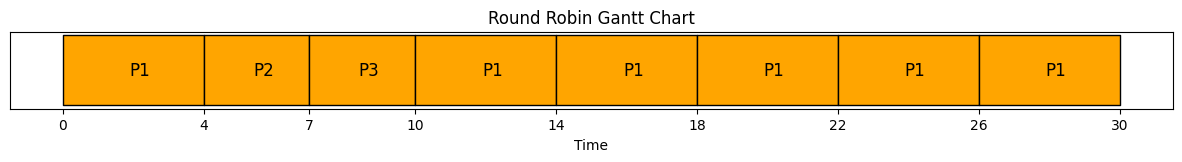

| Process   |   Burst Time |   Waiting Time |   Turnaround Time |
|:----------|-------------:|---------------:|------------------:|
| P1        |           24 |              6 |                30 |
| P2        |            3 |              4 |                 7 |
| P3        |            3 |              7 |                10 |
Average Waiting Time: 5.666666666666667
Average Turnaround Time: 15.666666666666666


In [5]:
# defining processes and burst time
processes = ['P1', 'P2', 'P3']
burst_time = [24, 3, 3]

# defining time quantum
time_quantum = 4

# generating the gantt chart
generate_rr_gantt_chart(processes, burst_time, time_quantum)

# computing waiting time
waiting_time = waiting_time_rr(processes, burst_time, time_quantum)

# computing turnaround time
turnaround_time = turnaround_time_rr(processes, burst_time, waiting_time)

# creting a dataframe of processes, burst time, waiting time and turnaround time
df = pd.DataFrame({'Process': processes, 'Burst Time': burst_time, 'Waiting Time': list(
    waiting_time.values()), 'Turnaround Time': list(turnaround_time.values())})

# printing the dataframe
print(df.to_markdown(index=False))

# computing the average waiting time
avg_waiting_time = sum(list(waiting_time.values())) / len(waiting_time)
print(f'Average Waiting Time: {avg_waiting_time}')

# computing the average turnaround time
avg_turnaround_time = sum(
    list(turnaround_time.values())) / len(turnaround_time)
print(f'Average Turnaround Time: {avg_turnaround_time}')